<a href="https://colab.research.google.com/github/SaraKarim23/Breast-Cancer-Wisconsin-Diagnostic-with-SSL-models/blob/main/Breast_Cancer_Wisconsin_(Diagnostic)_with_SSL_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:


!pip install pomegranate
import pomegranate as pg
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:


import warnings
warnings.simplefilter('ignore') #we don't wanna see that
np.random.seed(1) #i'm locking seed at the begining since we will use some heavy RNG stuff, be aware



In [4]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data['target']

In [5]:


df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:


df.describe()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
df = shuffle(df, random_state=1)
X = df.drop(['target', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 
             'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 
             'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 
             'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 
             'worst fractal dimension', 'mean area', 'mean perimeter', 'mean concave points'], axis=1)
y = df['target']

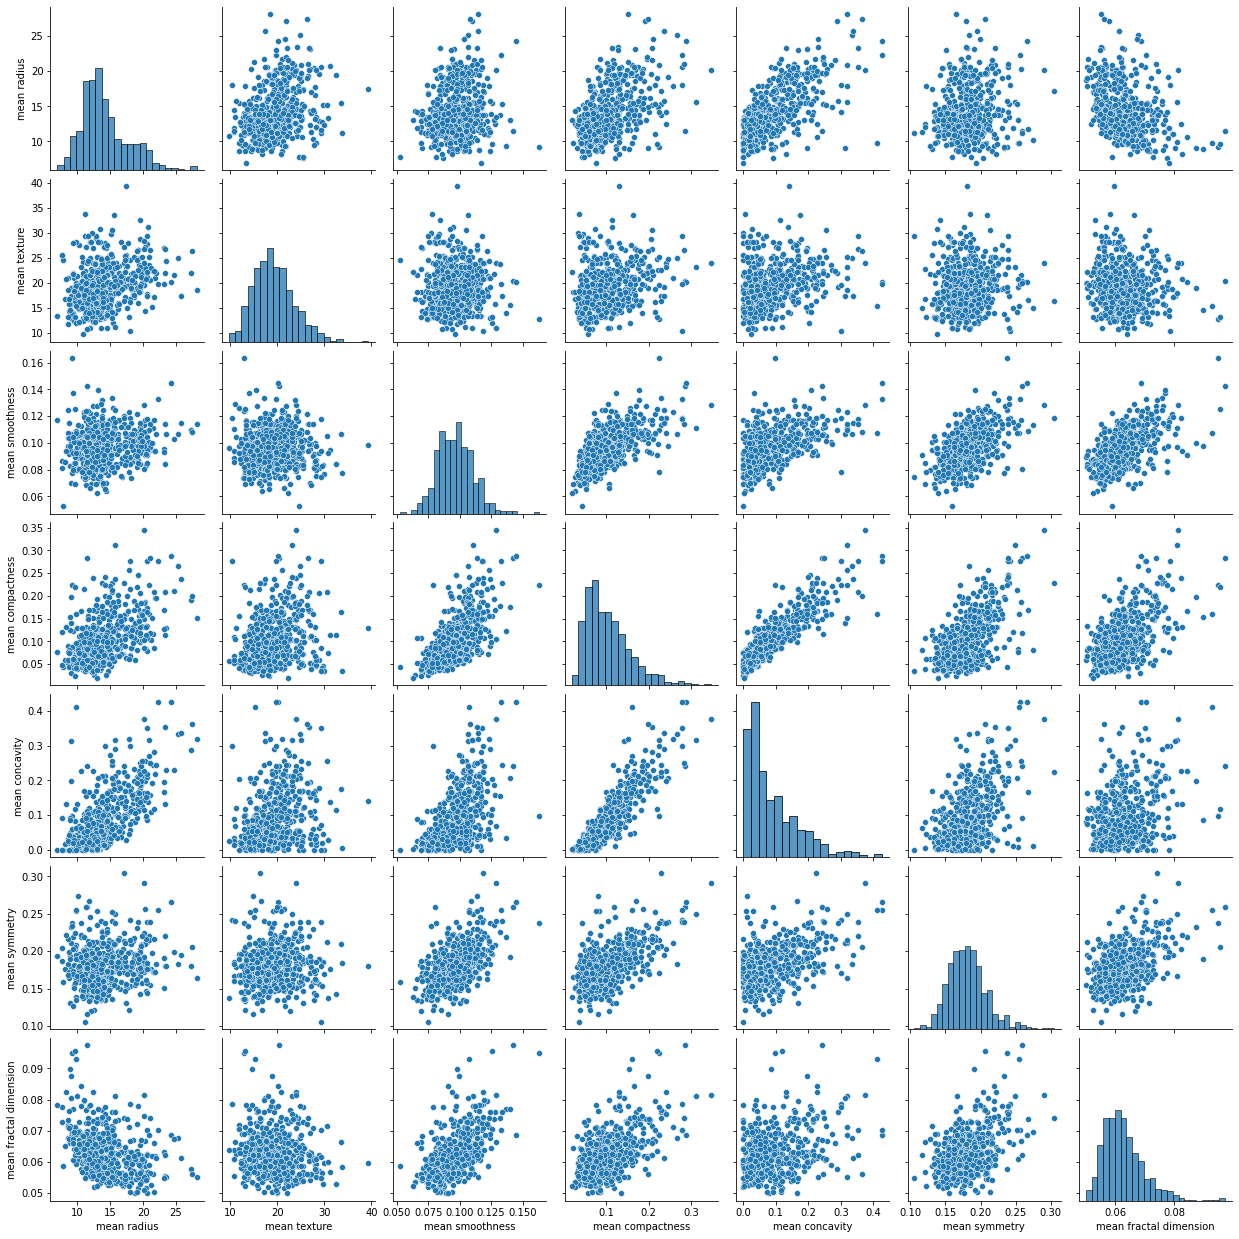

In [9]:
sns.pairplot(X)
#sns.pairplot(df)

In [10]:
X_1, X_2, X_3  = np.split(X, [int(.1*len(X)), int(.5*len(X))])
y_1, y_2, y_3  = np.split(y, [int(.1*len(y)), int(.5*len(y))])
y_1_2 = np.concatenate((y_1, y_2.apply(lambda x: -1)))
X_1_2 = np.concatenate((X_1, X_2))

In [11]:
index = ['Algorithm', 'ROC AUC']
results = pd.DataFrame(columns=index)

In [12]:
logreg = LogisticRegression(random_state=1, class_weight='balanced')
logreg.fit(X_1, y_1)
results = results.append(pd.Series(['Logistic Regression', roc_auc_score(y_3, logreg.predict_proba(X_3)[:,1])], 
                                   index=index), ignore_index=True)
results

,Algorithm,ROC AUC
0,Logistic Regression,0.972269


In [13]:
%%timeit
logreg_test = LogisticRegression(random_state=1, class_weight='balanced')
logreg_test.fit(df, y)
logreg_test.predict_proba(df);

10 loops, best of 5: 45.2 ms per loop


In [14]:
def label_prop_test(kernel, params_list, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(20,10))
    n, g = 0, 0
    roc_scores = []
    if kernel == 'rbf':
        for g in params_list:
            lp = LabelPropagation(kernel=kernel, n_neighbors=n, gamma=g, max_iter=100000, tol=0.0001)
            lp.fit(X_train, y_train)
            roc_scores.append(roc_auc_score(y_test, lp.predict_proba(X_test)[:,1]))
    if kernel == 'knn':
        for n in params_list:
            lp = LabelPropagation(kernel=kernel, n_neighbors=n, gamma=g, max_iter=100000, tol=0.0001)
            lp.fit(X_train, y_train)
            roc_scores.append(roc_auc_score(y_test, lp.predict_proba(X_test)[:,1]))
    plt.figure(figsize=(16,8));
    plt.plot(params_list, roc_scores)
    plt.title('Label Propagation ROC AUC with ' + kernel + ' kernel')
    plt.show()
    print('Best metrics value is at {}'.format(params_list[np.argmax(roc_scores)]))

<Figure size 1440x720 with 0 Axes>

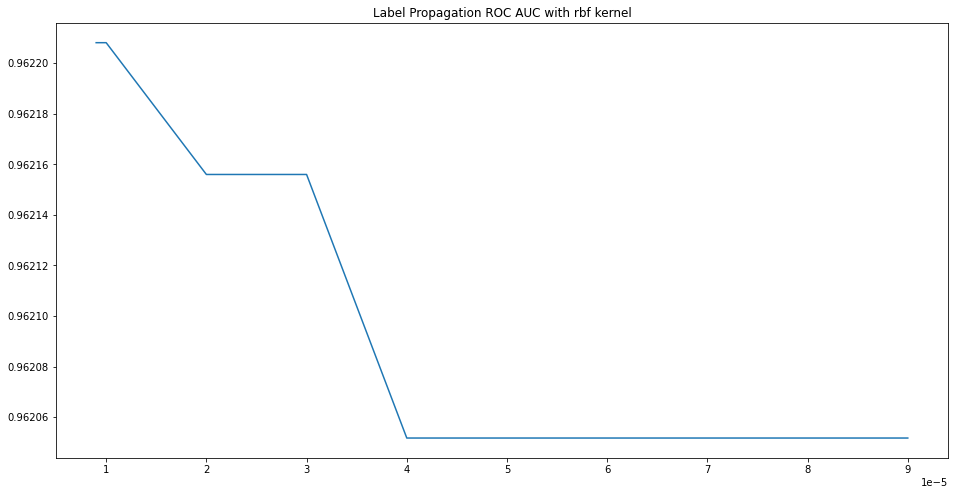

Best metrics value is at 9e-06


In [15]:
gammas = [9e-6, 1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5]
label_prop_test('rbf', gammas, X_1_2, X_3, y_1_2, y_3)

<Figure size 1440x720 with 0 Axes>

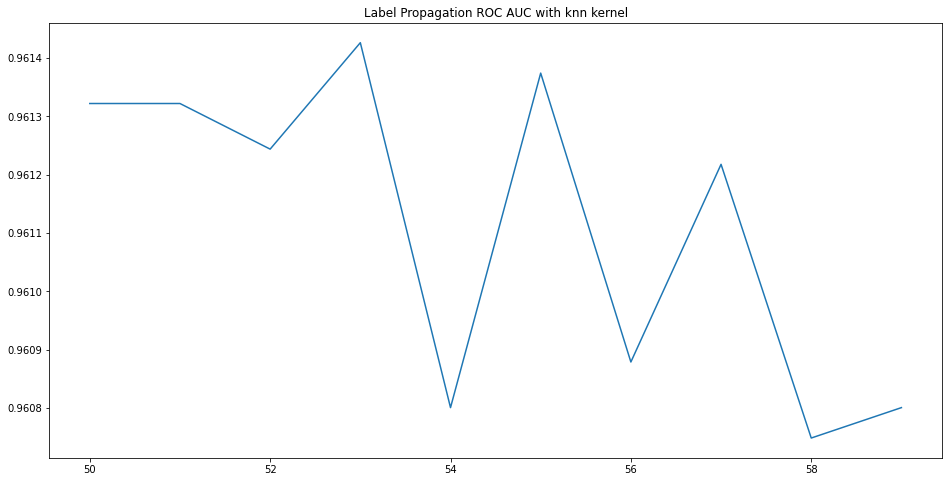

Best metrics value is at 53


In [16]:
ns = np.arange(50,60)
label_prop_test('knn', ns, X_1_2, X_3, y_1_2, y_3)

In [17]:
lp_rbf = LabelPropagation(kernel='rbf', gamma=9e-6, max_iter=100000, tol=0.0001)
lp_rbf.fit(X_1_2, y_1_2)
results = results.append(pd.Series(['Label Propagation RBF', 
                                    roc_auc_score(y_3, lp_rbf.predict_proba(X_3)[:,1])], index=index), ignore_index=True)

lp_knn = LabelPropagation(kernel='knn', n_neighbors=53, max_iter=100000, tol=0.0001)
lp_knn.fit(X_1_2, y_1_2)
results = results.append(pd.Series(['Label Propagation KNN', 
                                    roc_auc_score(y_3, lp_knn.predict_proba(X_3)[:,1])], index=index), ignore_index=True)

In [18]:
results

,Algorithm,ROC AUC
0,Logistic Regression,0.972269
1,Label Propagation RBF,0.962208
2,Label Propagation KNN,0.961426


In [19]:
%%timeit
rbf_lp_test = LabelPropagation(kernel='rbf')
rbf_lp_test.fit(df, y)
rbf_lp_test.predict_proba(df);

10 loops, best of 5: 34.5 ms per loop


In [20]:


%%timeit
knn_lp_test = LabelPropagation(kernel='knn')
knn_lp_test.fit(df, y)
knn_lp_test.predict_proba(df);



10 loops, best of 5: 36.1 ms per loop


In [21]:
def labels_spread_test(kernel, hyperparam, alphas, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(20,10))
    n, g = 0, 0
    roc_scores = []
    if kernel == 'rbf':
        g = hyperparam
    if kernel == 'knn':
        n = hyperparam
    for alpha in alphas:
        ls = LabelSpreading(kernel=kernel, n_neighbors=n, gamma=g, alpha=alpha, max_iter=1000, tol=0.001)
        ls.fit(X_train, y_train)
        roc_scores.append(roc_auc_score(y_test, ls.predict_proba(X_test)[:,1]))
    plt.figure(figsize=(16,8));
    plt.plot(alphas, roc_scores);
    plt.title('Label Spreading ROC AUC with ' + kernel + ' kernel')
    plt.show();
    print('Best metrics value is at {}'.format(alphas[np.argmax(roc_scores)]))

<Figure size 1440x720 with 0 Axes>

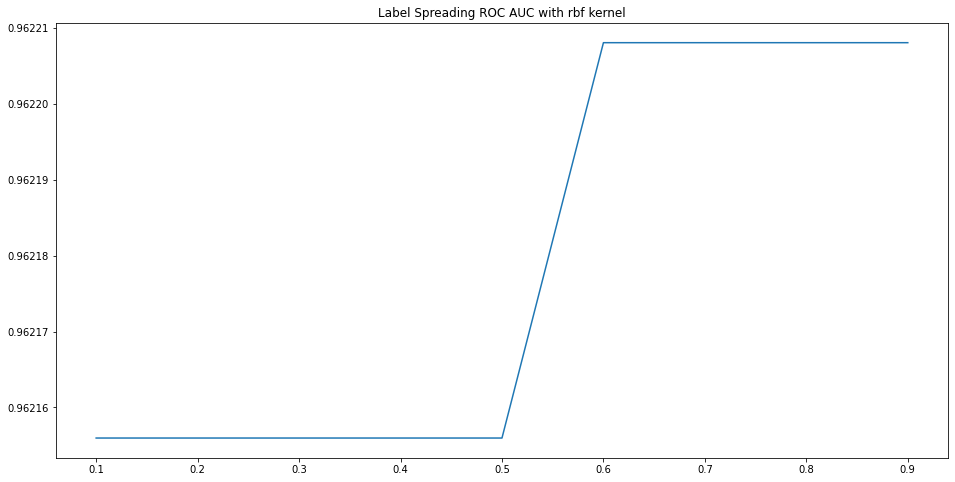

Best metrics value is at 0.6


In [22]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  
labels_spread_test('rbf', 1e-5, alphas, X_1_2, X_3, y_1_2, y_3)

<Figure size 1440x720 with 0 Axes>

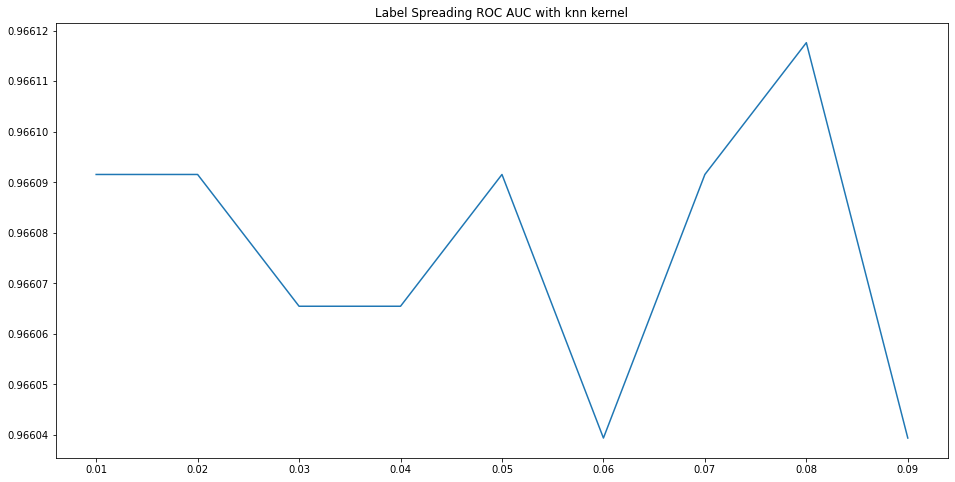

Best metrics value is at 0.08


In [23]:
alphas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]  
labels_spread_test('knn', 53, alphas, X_1_2, X_3, y_1_2, y_3)

In [24]:
ls_rbf = LabelSpreading(kernel='rbf', gamma=9e-6, alpha=0.6, max_iter=1000, tol=0.001)
ls_rbf.fit(X_1_2, y_1_2)
results = results.append(pd.Series(['Label Spreading RBF', 
                                    roc_auc_score(y_3, ls_rbf.predict_proba(X_3)[:,1])], index=index), ignore_index=True)
ls_knn = LabelSpreading(kernel='knn', n_neighbors=53, alpha=0.08, max_iter=1000, tol=0.001)
ls_knn.fit(X_1_2, y_1_2)
results = results.append(pd.Series(['Label Spreading KNN', 
                                    roc_auc_score(y_3, ls_knn.predict_proba(X_3)[:,1])], index=index), ignore_index=True)

In [25]:
results

,Algorithm,ROC AUC
0,Logistic Regression,0.972269
1,Label Propagation RBF,0.962208
2,Label Propagation KNN,0.961426
3,Label Spreading RBF,0.962208
4,Label Spreading KNN,0.966118


In [26]:
%%timeit
knn_ls_test = LabelSpreading(kernel='rbf')
knn_ls_test.fit(df, y)
knn_ls_test.predict_proba(df);

10 loops, best of 5: 37.8 ms per loop


In [27]:


%%timeit
knn_ls_test = LabelSpreading(kernel='knn')
knn_ls_test.fit(df, y)
knn_ls_test.predict_proba(df);



10 loops, best of 5: 35.7 ms per loop


In [28]:


nb = pg.NaiveBayes.from_samples(pg.ExponentialDistribution, X_1_2, y_1_2, verbose=True)
roc_auc_score(y_3, nb.predict_proba(X_3)[:,1])



[1] Improvement: 2.923343790143292	Time (s): 0.0005572
[2] Improvement: 0.10808239669634645	Time (s): 0.0006957
[3] Improvement: 0.0378283300420037	Time (s): 0.000608
Total Improvement: 3.0692545168816423
Total Time (s): 0.0070


0.9476125938281902

In [29]:
d = [pg.ExponentialDistribution, pg.PoissonDistribution, pg.NormalDistribution, 
     pg.ExponentialDistribution, pg.ExponentialDistribution, pg.PoissonDistribution, pg.NormalDistribution]
nb = pg.NaiveBayes.from_samples(d, X_1_2, y_1_2, verbose=True)
results = results.append(pd.Series(['Naive Bayes ICD Prior', 
                                    roc_auc_score(y_3, nb.predict_proba(X_3)[:,1])], index=index), ignore_index=True)

[1] Improvement: 46.64226628744052	Time (s): 0.000669
[2] Improvement: 24.608625154185575	Time (s): 0.0007806
[3] Improvement: 11.73148256053264	Time (s): 0.0007384
[4] Improvement: 5.213089281497673	Time (s): 0.0007005
[5] Improvement: 2.2577034309811097	Time (s): 0.0006912
[6] Improvement: 0.9720213764514938	Time (s): 0.0007145
[7] Improvement: 0.4199837863756102	Time (s): 0.0007067
[8] Improvement: 0.18361394820340138	Time (s): 0.0007038
[9] Improvement: 0.08192449140585722	Time (s): 0.0007126
Total Improvement: 92.11071031707388
Total Time (s): 0.0152


In [30]:


results



,Algorithm,ROC AUC
0,Logistic Regression,0.972269
1,Label Propagation RBF,0.962208
2,Label Propagation KNN,0.961426
3,Label Spreading RBF,0.962208
4,Label Spreading KNN,0.966118
5,Naive Bayes ICD Prior,0.816253


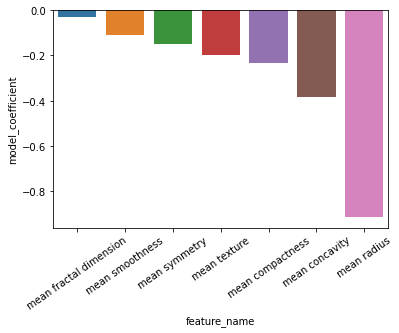

In [31]:
logReg_coeff = pd.DataFrame({'feature_name': list(X.columns.values), 
                             'model_coefficient': logreg.coef_.transpose().flatten()});
logReg_coeff = logReg_coeff.sort_values('model_coefficient',ascending=False);

fg = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff);
fg.set_xticklabels(rotation=35, labels=logReg_coeff['feature_name']);